In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# plt.rcParams['figure.dpi'] = 200
# See all columns
# pd.set_option('display.max_columns', None)

In [15]:
# paso = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/ResultadosElectorales.csv')
# paso = paso[paso['cargo_nombre']=='PRESIDENTE/A']
# paso.to_csv('PASO_PRESIDENTE.csv', index=False)
# generales = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones/ResultadosElectorales_2023.csv')
# generales = generales[generales['cargo_nombre']=='PRESIDENTE Y VICE']
# generales.to_csv('C:/Users/Marcos/Desktop/Elecciones PASO/GENERALES_PRESIDENTE.csv', index=False)

In [4]:
paso = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/PASO_PRESIDENTE.csv')
generales = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/GENERALES_PRESIDENTE.csv')

C:\Users\Marcos\AppData\Local\Temp\ipykernel_1492\3105831611.py:1: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  paso = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones PASO/PASO_PRESIDENTE.csv')


In [5]:
paso['id_mesa'] = paso['distrito_nombre'].astype(str)+'/'+paso['seccion_nombre'].astype(str)+'/'+paso['circuito_id'].astype(str)+'/'+paso['mesa_id'].astype(str)
paso1 = paso.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          # 'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

PASO = paso1[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','lista_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
PASO = PASO.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
PASO['agrupacion_nombre'] = PASO['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
PASO.head(5)

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,lista_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,PRINCIPIOS Y VALORES,"1A- TIERRA, TECHO Y TRABAJO",137,POSITIVO,3
1,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,HACEMOS POR NUESTRO PAIS,A- HACEMOS,133,POSITIVO,3
2,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,A- CELESTE Y BLANCA,134,POSITIVO,49
3,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,UNION POR LA PATRIA,B- JUSTA Y SOBERANA,134,POSITIVO,25
4,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,344,FRENTE LIBER.AR,A- DEMOS,131,POSITIVO,0


In [6]:
generales['id_mesa'] = generales['distrito_nombre'].astype(str)+'/'+generales['seccion_nombre'].astype(str)+'/'+generales['circuito_id'].astype(str)+'/'+generales['mesa_id'].astype(str)
generales1 = generales.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

GENERALES = generales1[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
GENERALES = GENERALES.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
GENERALES['agrupacion_nombre'] = GENERALES['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
GENERALES.head(5)

,distrito_nombre,distrito_id,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,UNION POR LA PATRIA,134,POSITIVO,96
1,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,JUNTOS POR EL CAMBIO,132,POSITIVO,65
2,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,LA LIBERTAD AVANZA,135,POSITIVO,44
3,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,FRENTE DE IZQUIERDA,136,POSITIVO,13
4,Ciudad Autónoma de Buenos Aires,1,Ciudad Autónoma de Buenos Aires/Comuna 01/00001/1,345,HACEMOS POR NUESTRO PAIS,133,POSITIVO,4


In [7]:
PASO_PERCENTAGE = PASO.copy()
PASO_PERCENTAGE['votos_porcentaje'] = round(PASO_PERCENTAGE.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
# PASO_PERCENTAGE.head()

In [8]:
GENERALES_PERCENTAGE = GENERALES.copy()
GENERALES_PERCENTAGE['votos_porcentaje'] = round(GENERALES_PERCENTAGE.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
# GENERALES_PERCENTAGE.head()

In [9]:
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE[PASO_PERCENTAGE['agrupacion_nombre'].isin(['UNION POR LA PATRIA','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA'])]
########################################### PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3[PASO_PERCENTAGE_TOP_3['lista_nombre'].isin(['A- CELESTE Y BLANCA','B- LA FUERZA DEL CAMBIO','A- LIBERTAD POR SIEMPRE'])]
PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3.drop('lista_nombre',axis=1).reset_index(drop=True)
# PASO_PERCENTAGE_TOP_3 = PASO_PERCENTAGE_TOP_3.rename(columns = {'votos_cantidad':'n_votos_PASO','votos_porcentaje':'%_votos_PASO'})
# PASO_PERCENTAGE_TOP_3.head()

In [10]:
GENERALES_PERCENTAGE_TOP_3 = GENERALES_PERCENTAGE[GENERALES_PERCENTAGE['agrupacion_nombre'].isin(['UNION POR LA PATRIA','JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA'])]
# GENERALES_PERCENTAGE_TOP_3 = GENERALES_PERCENTAGE_TOP_3.rename(columns = {'votos_cantidad':'n_votos_GENERALES','votos_porcentaje':'%_votos_GENERALES'})
# PASO_PERCENTAGE_TOP_3.head()

<hr>
<hr>
<hr>

In [13]:
GENERALES_PERCENTAGE_TOP_3_reduced1 = GENERALES_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
GENERALES_PERCENTAGE_TOP_3_reduced = GENERALES_PERCENTAGE_TOP_3_reduced1.copy()
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced1['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - Generales')
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTOS POR EL CAMBIO'], 'JUNTOS POR EL CAMBIO - Generales')
GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = GENERALES_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['LA LIBERTAD AVANZA'], 'LA LIBERTAD AVANZA - Generales')

In [14]:
PASO_PERCENTAGE_TOP_3_reduced1 = PASO_PERCENTAGE_TOP_3[['id_mesa','agrupacion_nombre','votos_cantidad','votos_porcentaje']]
PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3_reduced1.copy()
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced1['agrupacion_nombre'].replace(['UNION POR LA PATRIA'], 'UNION POR LA PATRIA - PASO')
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['JUNTOS POR EL CAMBIO'], 'JUNTOS POR EL CAMBIO - PASO')
PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'] = PASO_PERCENTAGE_TOP_3_reduced['agrupacion_nombre'].replace(['LA LIBERTAD AVANZA'], 'LA LIBERTAD AVANZA - PASO')


PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3_reduced.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad','votos_porcentaje'].sum().reset_index()
PASO_PERCENTAGE_TOP_3_reduced

C:\Users\Marcos\AppData\Local\Temp\ipykernel_1492\284297424.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PASO_PERCENTAGE_TOP_3_reduced = PASO_PERCENTAGE_TOP_3_reduced.groupby(['id_mesa','agrupacion_nombre'])['votos_cantidad','votos_porcentaje'].sum().reset_index()


,id_mesa,agrupacion_nombre,votos_cantidad,votos_porcentaje
0,Buenos Aires/25 de Mayo/00980/1,JUNTOS POR EL CAMBIO - PASO,77,33.63
1,Buenos Aires/25 de Mayo/00980/1,LA LIBERTAD AVANZA - PASO,43,18.78
2,Buenos Aires/25 de Mayo/00980/1,UNION POR LA PATRIA - PASO,64,27.94
3,Buenos Aires/25 de Mayo/00980/10,JUNTOS POR EL CAMBIO - PASO,67,25.19
4,Buenos Aires/25 de Mayo/00980/10,LA LIBERTAD AVANZA - PASO,75,28.20
...,...,...,...,...
313592,Tucumán/Yerba Buena/0216C/3498,LA LIBERTAD AVANZA - PASO,87,31.64
313593,Tucumán/Yerba Buena/0216C/3498,UNION POR LA PATRIA - PASO,67,24.36
313594,Tucumán/Yerba Buena/0216C/3499,JUNTOS POR EL CAMBIO - PASO,122,44.85
313595,Tucumán/Yerba Buena/0216C/3499,LA LIBERTAD AVANZA - PASO,82,30.15


In [15]:
DISTRIBUTIONS = pd.concat([GENERALES_PERCENTAGE_TOP_3_reduced, PASO_PERCENTAGE_TOP_3_reduced], ignore_index=True)
DISTRIBUTIONS = DISTRIBUTIONS.sort_values(['id_mesa','agrupacion_nombre'])
DISTRIBUTIONS

,id_mesa,agrupacion_nombre,votos_cantidad,votos_porcentaje
21979,Buenos Aires/25 de Mayo/00980/1,JUNTOS POR EL CAMBIO - Generales,84,30.66
313560,Buenos Aires/25 de Mayo/00980/1,JUNTOS POR EL CAMBIO - PASO,77,33.63
21980,Buenos Aires/25 de Mayo/00980/1,LA LIBERTAD AVANZA - Generales,72,26.28
313561,Buenos Aires/25 de Mayo/00980/1,LA LIBERTAD AVANZA - PASO,43,18.78
21978,Buenos Aires/25 de Mayo/00980/1,UNION POR LA PATRIA - Generales,91,33.21
...,...,...,...,...
627154,Tucumán/Yerba Buena/0216C/3499,JUNTOS POR EL CAMBIO - PASO,122,44.85
312025,Tucumán/Yerba Buena/0216C/3499,LA LIBERTAD AVANZA - Generales,84,29.17
627155,Tucumán/Yerba Buena/0216C/3499,LA LIBERTAD AVANZA - PASO,82,30.15
312026,Tucumán/Yerba Buena/0216C/3499,UNION POR LA PATRIA - Generales,82,28.47


In [16]:
DISTRIBUTIONS_UXP = DISTRIBUTIONS[DISTRIBUTIONS['agrupacion_nombre'].isin(['UNION POR LA PATRIA - Generales','UNION POR LA PATRIA - PASO'])]

In [17]:
DISTRIBUTIONS_JXC = DISTRIBUTIONS[DISTRIBUTIONS['agrupacion_nombre'].isin(['JUNTOS POR EL CAMBIO - Generales','JUNTOS POR EL CAMBIO - PASO'])]

In [18]:
DISTRIBUTIONS_LLA = DISTRIBUTIONS[DISTRIBUTIONS['agrupacion_nombre'].isin(['LA LIBERTAD AVANZA - Generales','LA LIBERTAD AVANZA - PASO'])]

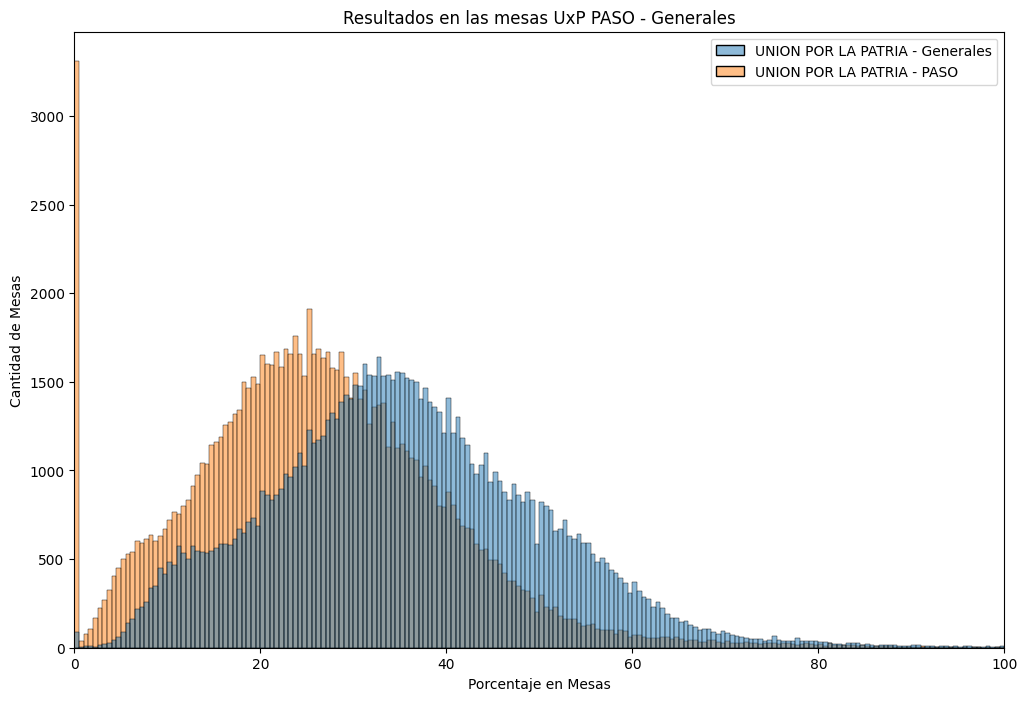

In [19]:
plt.figure(figsize=(12,8))
chart = sns.histplot(DISTRIBUTIONS_UXP, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))
plt.title('Resultados en las mesas UxP PASO - Generales')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('')
plt.show()

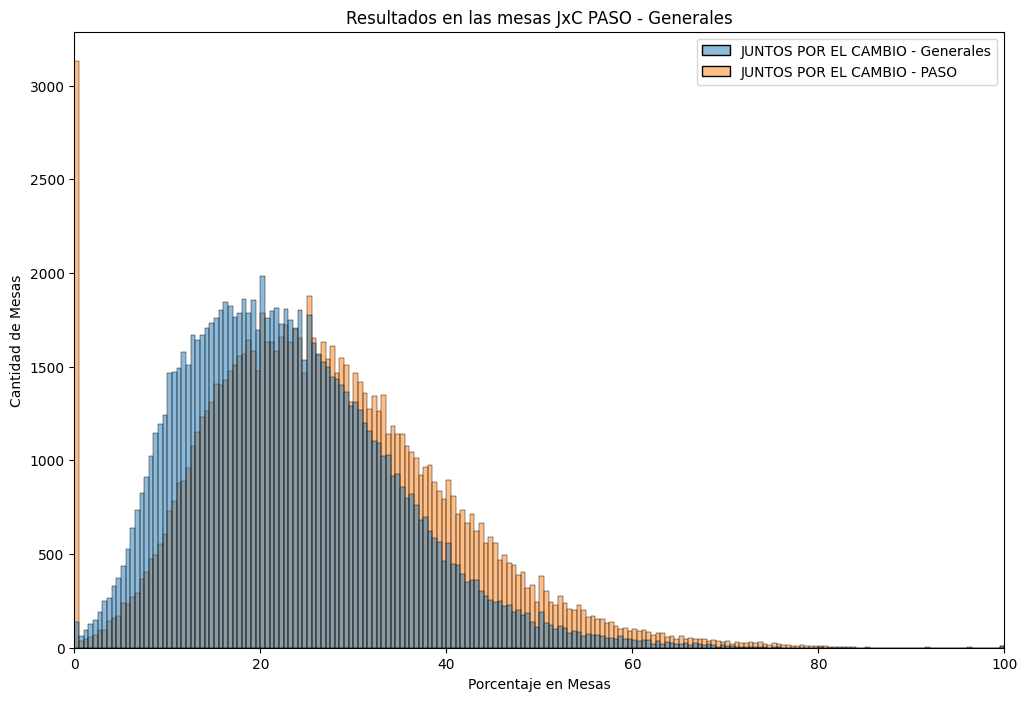

In [20]:
plt.figure(figsize=(12,8))
chart = sns.histplot(DISTRIBUTIONS_JXC, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))

plt.title('Resultados en las mesas JxC PASO - Generales')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('')
plt.show()

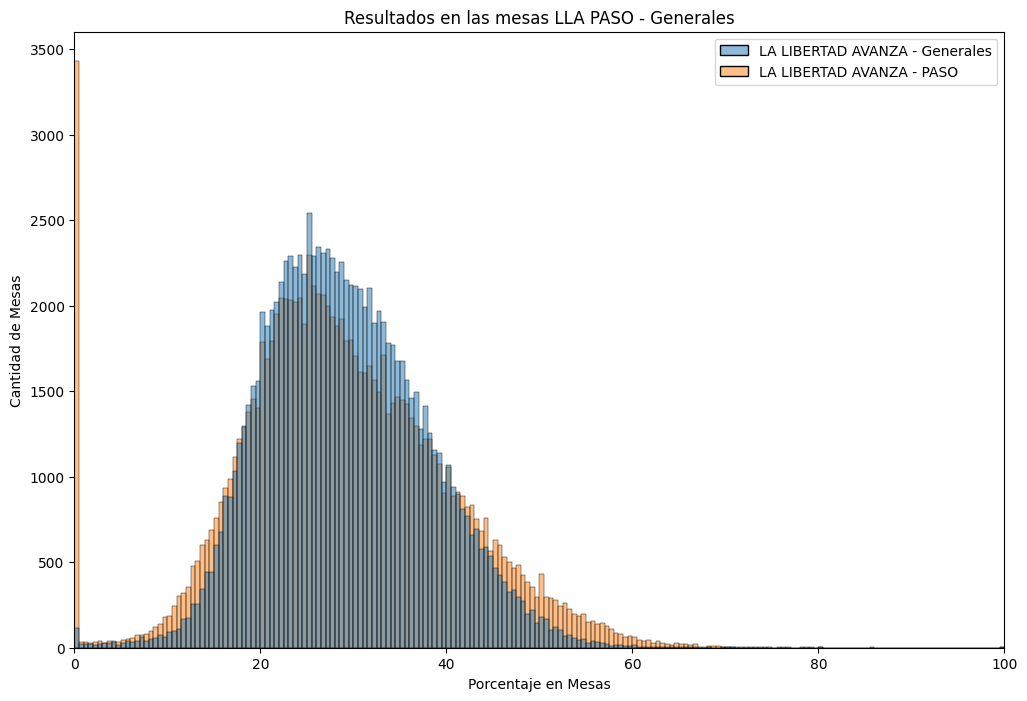

In [21]:
plt.figure(figsize=(12,8))
chart = sns.histplot(DISTRIBUTIONS_LLA, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))

plt.title('Resultados en las mesas LLA PASO - Generales')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('')
plt.show()

<hr>
<hr>
<hr>

In [22]:
MESAS_PORCENTAJE = GENERALES_PERCENTAGE_TOP_3_reduced1.merge(PASO_PERCENTAGE_TOP_3_reduced1, on=['id_mesa', 'agrupacion_nombre'], how='left')

In [34]:
MESAS_PORCENTAJE[MESAS_PORCENTAJE['id_mesa']=='Misiones/Capital/00008/687']

,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
382703,Misiones/Capital/00008/687,UNION POR LA PATRIA,97,56.0,34.77,22.67
382704,Misiones/Capital/00008/687,UNION POR LA PATRIA,97,7.0,34.77,2.83
382705,Misiones/Capital/00008/687,JUNTOS POR EL CAMBIO,37,33.0,13.26,13.36
382706,Misiones/Capital/00008/687,JUNTOS POR EL CAMBIO,37,16.0,13.26,6.48
382707,Misiones/Capital/00008/687,LA LIBERTAD AVANZA,8,116.0,2.87,46.96


In [23]:
MESAS_PORCENTAJE = MESAS_PORCENTAJE.rename(columns={'votos_cantidad_x':'n_generales','votos_porcentaje_x':'%_generales','votos_cantidad_y':'n_paso','votos_porcentaje_y':'%_paso',})
MESAS_PORCENTAJE = MESAS_PORCENTAJE[['id_mesa','agrupacion_nombre','n_generales','n_paso','%_generales','%_paso']]

In [35]:
MESAS_PORCENTAJE[MESAS_PORCENTAJE['id_mesa']=='Misiones/Capital/00008/687']

,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
382703,Misiones/Capital/00008/687,UNION POR LA PATRIA,97,56.0,34.77,22.67
382704,Misiones/Capital/00008/687,UNION POR LA PATRIA,97,7.0,34.77,2.83
382705,Misiones/Capital/00008/687,JUNTOS POR EL CAMBIO,37,33.0,13.26,13.36
382706,Misiones/Capital/00008/687,JUNTOS POR EL CAMBIO,37,16.0,13.26,6.48
382707,Misiones/Capital/00008/687,LA LIBERTAD AVANZA,8,116.0,2.87,46.96


In [29]:
# MESAS_PORCENTAJE = MESAS_PORCENTAJE[MESAS_PORCENTAJE['n_generales']==3*]
max_votos = MESAS_PORCENTAJE.groupby('id_mesa')['n_generales'].transform('max')
condition = MESAS_PORCENTAJE['n_generales'] == max_votos
MESAS_PORCENTAJE_GANADOR = MESAS_PORCENTAJE[condition].reset_index(drop=True)
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE_GANADOR[(MESAS_PORCENTAJE_GANADOR['n_generales'] <= 0.2*MESAS_PORCENTAJE_GANADOR['n_paso']) & (MESAS_PORCENTAJE_GANADOR['n_generales']!=0) & (MESAS_PORCENTAJE_GANADOR['n_paso']>=10)]
MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_generales'],ascending=False)


,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
175067,Santiago del Estero/Moreno/00142/1823,UNION POR LA PATRIA,22,122.0,44.00,84.14
95548,Córdoba/Capital/0010L/1611,LA LIBERTAD AVANZA,7,78.0,28.00,35.45
175719,Santiago del Estero/Río Hondo/00192/2146,UNION POR LA PATRIA,6,190.0,54.55,96.45


In [38]:
# MESAS_PORCENTAJE = MESAS_PORCENTAJE[MESAS_PORCENTAJE['n_generales']==3*]
# max_votos = MESAS_PORCENTAJE.groupby('id_mesa')['n_generales'].transform('max')
# condition = MESAS_PORCENTAJE['n_generales'] == max_votos
# MESAS_PORCENTAJE_GANADOR = MESAS_PORCENTAJE[condition].reset_index(drop=True)
MESAS_PORCENTAJE_GANADOR_values = MESAS_PORCENTAJE[(MESAS_PORCENTAJE['n_generales'] <= 0.1*MESAS_PORCENTAJE['n_paso']) & (MESAS_PORCENTAJE['n_generales']!=0) & (MESAS_PORCENTAJE['n_paso']>=10)]
MESAS_PORCENTAJE_GANADOR_values.sort_values(['n_paso'],ascending=False)

,id_mesa,agrupacion_nombre,n_generales,n_paso,%_generales,%_paso
499360,Santiago del Estero/Río Hondo/00192/2146,UNION POR LA PATRIA,6,190.0,54.55,96.45
491536,Santiago del Estero/Capital/00004/158,UNION POR LA PATRIA,11,181.0,20.37,69.88
488246,Santiago del Estero/Alberdi/00032/835,UNION POR LA PATRIA,3,154.0,27.27,93.90
488313,Santiago del Estero/Alberdi/00034/849,UNION POR LA PATRIA,1,139.0,1.85,65.57
415447,Salta/Capital/0005A/1886,LA LIBERTAD AVANZA,3,139.0,1.13,59.91
...,...,...,...,...,...,...
240281,Córdoba/Capital/0010C/1313,JUNTOS POR EL CAMBIO,1,13.0,0.41,5.58
240282,Córdoba/Capital/0010C/1313,JUNTOS POR EL CAMBIO,1,12.0,0.41,5.15
246656,Córdoba/Capital/0013F/2659,UNION POR LA PATRIA,1,12.0,0.39,4.60
500149,Santiago del Estero/San Martín/00200/2292,LA LIBERTAD AVANZA,1,11.0,0.43,4.68
